In [1]:
import numpy as np
import matplotlib.pyplot as plt

import gropt
from helper_utils import *

%matplotlib inline

# GrOpt

### Gradient design toolbox 
#### Written in C (for compiling on scanners), which wrappers in Python and Matlab for prototyping

Ideally **_any_** waveform can be described by a set of constraints on moments and everything else

Currently implemented in various forms on Siemens and GE scanners

***

## Example 1: Phase Encoding Gradient

#### Constraints on:
- Maximum gradient amplitude
- Maximum slew rate
- 0th moment = 11.74 (mT*ms)/m = The area needed to encode a 1mm spatial resolution line in k-space

Min TE = 0.6640625000000001 ms


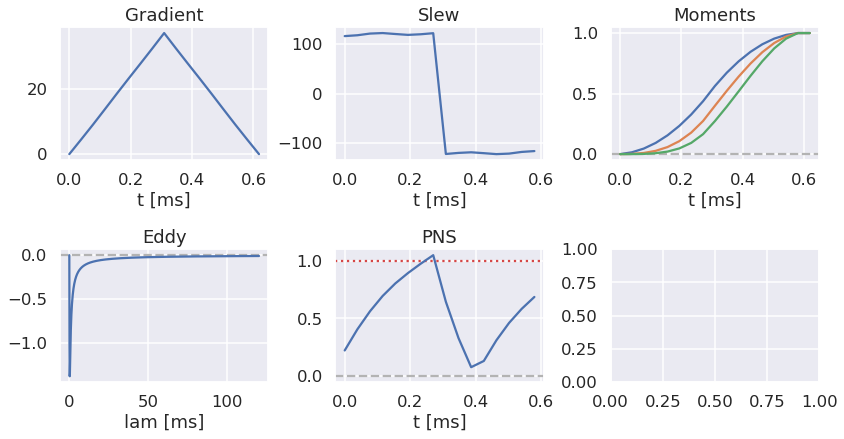

In [10]:
params = {}

# Free mode says we are in a feasibility search, i.e. no objective function
params['mode'] = 'free'

# Set hardware limits
params['gmax']  = 0.05   # Maximum gradient amplitude, G/cm
params['smax']  = 120.0  # Maximum slew rate, mT/m/ms 

# Moment parameters have a lot of options, reading the docs is necessary
params['moment_params']  = [[0, 0, 0, -1, -1, 11.75, 1.0e-3]]

# Raster time of the gradient waveform being optimized
params['dt']  = 40e-6


G, T_min = get_min_TE(params, max_TE = 2)
print('Min TE =', T_min, 'ms')
plot_waveform(G, params)

#### Reducing gmax to see its effect:

Min TE = 0.7716796875 ms


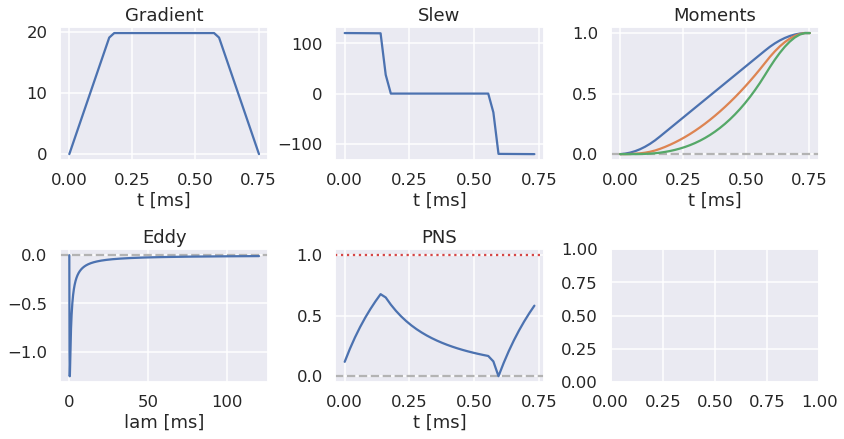

In [11]:
params = {}
params['mode'] = 'free'

# ************
# gmax changed to 20 mT/m 
# ************
params['gmax']  = 0.02
params['smax']  = 120.0

params['moment_params']  = [[0, 0, 0, -1, -1, 11.75, 1.0e-3]]
params['dt']  = 20e-6


G, T_min = get_min_TE(params, max_TE = 2)
print('Min TE =', T_min, 'ms')
plot_waveform(G, params)

In [ ]:
#### Adding -:

Min TE = 1.0328125000000001 ms


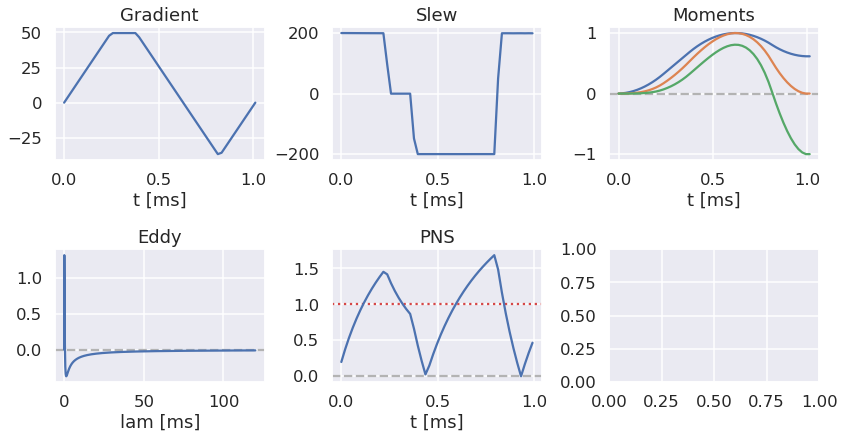

In [18]:
params = {}
params['mode'] = 'free'

params['gmax']  = 0.05
params['smax']  = 200.0

params['moment_params']  = [[0, 0, 0, -1, -1, 11.75, 1.0e-3]]
# ************
# Additional moment constraint added on M1 = 0
# ************
params['moment_params'].append([0, 1, 0, -1, -1, 0, 1.0e-3])
params['dt']  = 20e-6


G, T_min = get_min_TE(params, max_TE = 2.5)
print('Min TE =', T_min, 'ms')
plot_waveform(G, params)